In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)
df = pd.read_csv('salary_data_cleaned.csv')
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_text,job_state,age,python,R,spark,aws,sql,microsoft_excel
0,Data Scientist,$78k-$133k\r\n(Glassdoor Est.),"Publishers Clearing House (PCH), located in Je...",3.4,Publishers Clearing House LLC\r\n3.4,"Jericho, NY",-1,501 to 1000 Employees,1953,Company - Private,...,105.5,Publishers Clearing House LLC\r\n,NY,67,1,0,0,1,0,1
1,"Data Scientist, Health Economics & Advanced An...",$81k-$134k\r\n(Glassdoor Est.),Overview\r\n\r\n\r\nAvalere Health is seeking ...,3.2,Avalere Health LLC\r\n3.2,"Washington, DC",-1,201 to 500 Employees,2000,Company - Public,...,107.5,Avalere Health LLC\r\n,DC,20,1,0,0,0,1,1
2,Scientist,$35k-$85k\r\n(Glassdoor Est.),Description:\r\n\r\nJOB SUMMARY\r\n\r\nContrib...,3.5,Grand River Aseptic Manufacturing\r\n3.5,"Grand Rapids, MI",-1,51 to 200 Employees,-1,Company - Public,...,60.0,Grand River Aseptic Manufacturing\r\n,MI,-1,0,0,0,0,0,1
3,Data Scientist,$67k-$109k\r\n(Glassdoor Est.),Sharecare is the digital health company that h...,3.5,Sharecare\r\n3.5,"Cary, NC",-1,1001 to 5000 Employees,2010,Company - Private,...,88.0,Sharecare\r\n,NC,10,1,0,0,0,0,0
4,"Sr Manager, Data Science - Policy & Advocacy",$33k-$71k\r\n(Glassdoor Est.),Job Number: 25737\r\n\r\nReynolds American Inc...,3.8,British American Tobacco p.l.c.\r\n3.8,"Winston-Salem, NC",-1,10000+ Employees,1902,Company - Public,...,52.0,British American Tobacco p.l.c.\r\n,NC,118,0,0,0,0,0,1
5,Contract Data Analyst,$54k-$98k\r\n(Glassdoor Est.),Overview:\r\n\r\nAmyx is seeking to hire a Con...,4.0,"Amyx, Inc.\r\n4.0","Arlington, VA",-1,501 to 1000 Employees,1999,Company - Private,...,76.0,"Amyx, Inc.\r\n",VA,21,0,0,0,1,0,1
6,DOD Data Scientist/Engineer,$94k-$155k\r\n(Glassdoor Est.),Overview\r\n\r\nGuidehouse is a leading manage...,3.3,Guidehouse LLP\r\n3.3,"Patuxent River, MD",-1,5001 to 10000 Employees,2018,Company - Private,...,124.5,Guidehouse LLP\r\n,MD,2,1,0,0,0,1,1
7,Data Analyst,$62k-$114k\r\n(Glassdoor Est.),OkCupid is looking for an analyst to contribut...,4.2,OkCupid\r\n4.2,"New York, NY",-1,1 to 50 Employees,2003,Company - Public,...,88.0,OkCupid\r\n,NY,17,1,0,0,0,1,0
8,Data Systems Analyst,$34k-$60k\r\n(Glassdoor Est.),"Ready to make an impact? If so, read on!\r\n\r...",3.3,Government Employees Insurance Company\r\n3.3,"Indianapolis, IN",-1,10000+ Employees,1936,Subsidiary or Business Segment,...,47.0,Government Employees Insurance Company\r\n,IN,84,1,0,0,0,1,0
9,Quantitative Analyst II,$43k-$86k\r\n(Glassdoor Est.),Quantitative Analyst II will design and conduc...,3.3,"Lands' End, Inc.\r\n3.3","Dodgeville, WI",-1,5001 to 10000 Employees,1963,Company - Public,...,64.5,"Lands' End, Inc.\r\n",WI,57,1,0,0,1,1,0


In [4]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [5]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist    300
analyst           199
na                100
data engineer      66
manager            34
Name: job_simp, dtype: int64

In [6]:
df['seniority'] = df['Job Title'].apply(seniority)
df.job_simp.value_counts()

data scientist    300
analyst           199
na                100
data engineer      66
manager            34
Name: job_simp, dtype: int64

In [7]:
# Fix Job description length

df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [8]:
# Check competitor's count

df['Competitors'] = df['Competitors'].apply(str)
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [9]:
df['company_text'] = df.company_text.apply(lambda x: x.replace('\r\n', ''))
df['company_text']

0                       Publishers Clearing House LLC
1                                  Avalere Health LLC
2                   Grand River Aseptic Manufacturing
3                                           Sharecare
4                     British American Tobacco p.l.c.
5                                          Amyx, Inc.
6                                      Guidehouse LLP
7                                             OkCupid
8              Government Employees Insurance Company
9                                    Lands' End, Inc.
10                       SpawGlass Construction Corp.
11                      Apollo Global Management, LLC
12                              The MITRE Corporation
13                               Clover Network, Inc.
14              Pacific Northwest National Laboratory
15                                          Visa Inc.
16                       Southwest Research Institute
17                                 ClearCut Analytics
18                     Airli

In [10]:
df.to_csv('EDA_data.csv', index = False)

In [108]:
df.describe()

,Rating,Headquarters,Founded,employer provided,min_salary,max_salary,avg_salary,age,python,R,spark,aws,sql,microsoft_excel,desc_len,num_comp
count,699.000000,699.0,699.000000,699.00000,699.000000,699.000000,699.000000,699.000000,699.000000,699.0,699.00000,699.000000,699.000000,699.000000,699.000000,699.0
mean,3.736624,-1.0,1881.891273,0.04721,63.901288,112.648069,88.274678,39.756795,0.759657,0.0,0.04721,0.191702,0.567954,0.526466,4094.899857,0.0
std,0.467730,0.0,427.121188,0.21224,22.934383,27.123971,23.779664,31.550902,0.427598,0.0,0.21224,0.393922,0.495715,0.499657,1371.452496,0.0
min,3.200000,-1.0,-1.000000,0.00000,12.000000,60.000000,47.000000,-1.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,1358.000000,0.0
25%,3.300000,-1.0,1953.000000,0.00000,49.000000,94.000000,69.000000,10.000000,1.000000,0.0,0.00000,0.000000,0.000000,0.000000,3190.000000,0.0
50%,3.700000,-1.0,1984.000000,0.00000,68.000000,112.000000,88.000000,33.000000,1.000000,0.0,0.00000,0.000000,1.000000,1.000000,3979.000000,0.0
75%,4.000000,-1.0,2003.000000,0.00000,80.000000,133.000000,103.500000,62.000000,1.000000,0.0,0.00000,0.000000,1.000000,1.000000,4993.000000,0.0
max,5.000000,-1.0,2018.000000,1.00000,112.000000,178.000000,145.000000,118.000000,1.000000,0.0,1.00000,1.000000,1.000000,1.000000,6377.000000,0.0


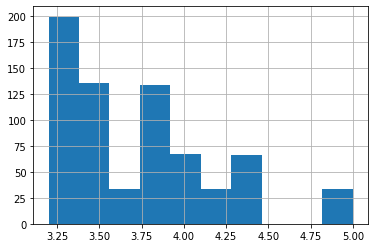

In [109]:
df.Rating.hist()

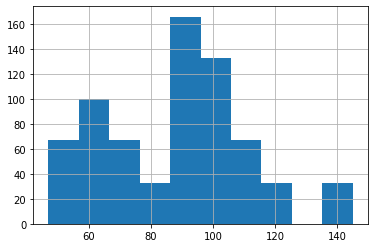

In [110]:
df.avg_salary.hist()

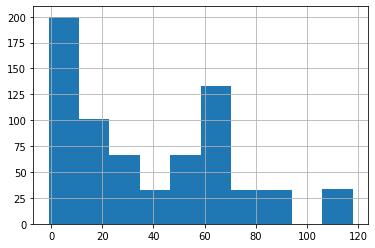

In [111]:
df.age.hist()

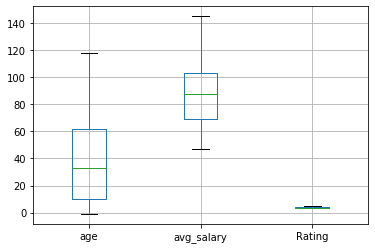

In [112]:
df.boxplot(column = ['age', 'avg_salary', 'Rating'])

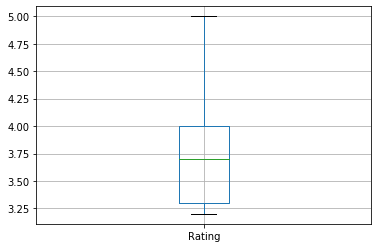

In [113]:
df.boxplot(column = 'Rating')

In [114]:
df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.127950,-0.137310,0.132812
avg_salary,-0.127950,1.000000,-0.004744,0.154342
Rating,-0.137310,-0.004744,1.000000,-0.112569
desc_len,0.132812,0.154342,-0.112569,1.000000


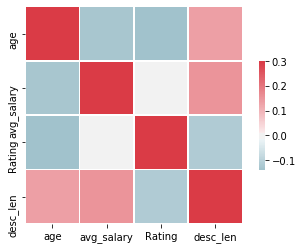

In [115]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age', 'avg_salary', 'Rating', 'desc_len']].corr(), vmax=.3, center=0, cmap=cmap,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [116]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_text', 'job_state', 'python', 'R', 'spark', 'aws',
       'sql', 'microsoft_excel', 'job_simp', 'seniority']]

graph for Location: total = 20


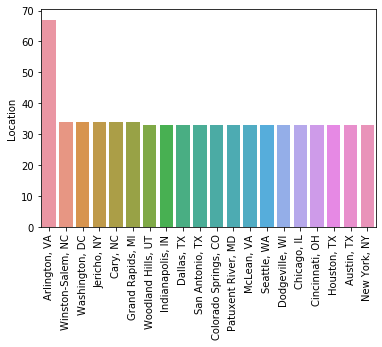

graph for Headquarters: total = 1


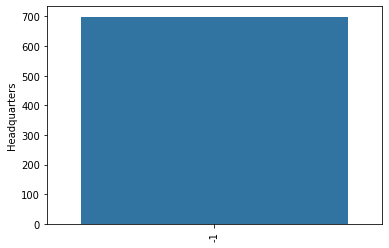

graph for Size: total = 7


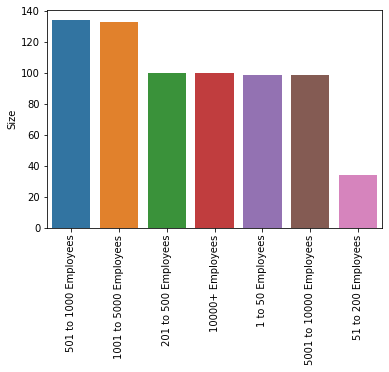

graph for Type of ownership: total = 5


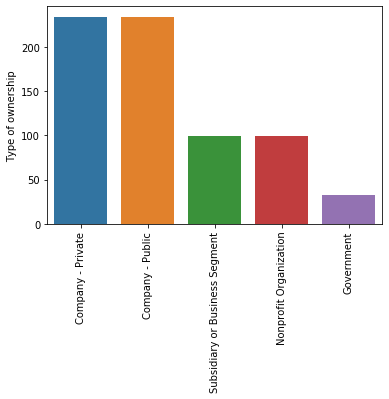

graph for Industry: total = 14


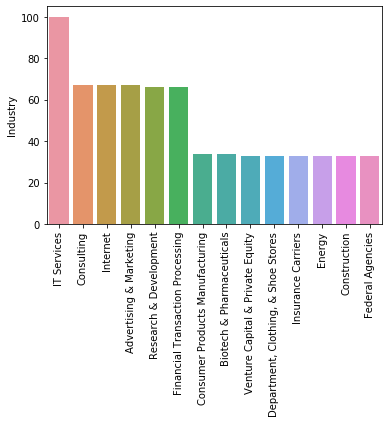

graph for Sector: total = 10


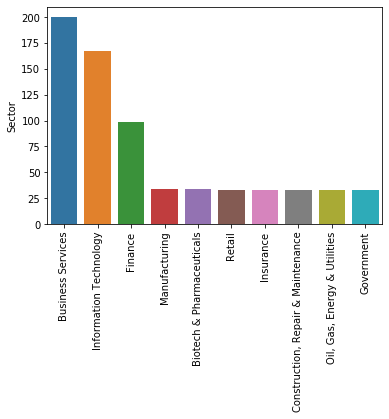

graph for Revenue: total = 7


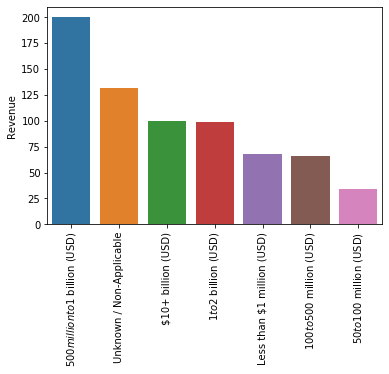

graph for company_text: total = 21


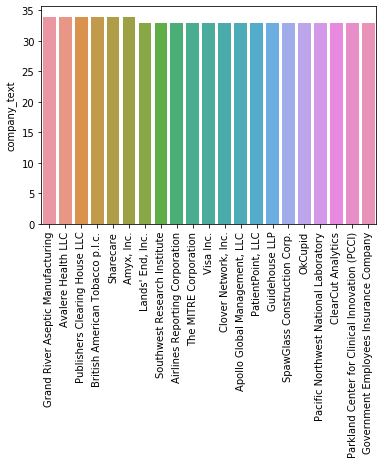

graph for job_state: total = 14


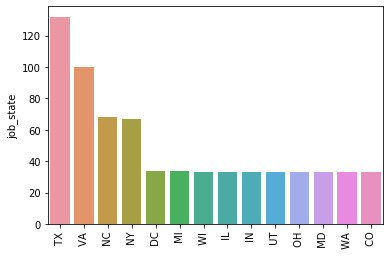

graph for python: total = 2


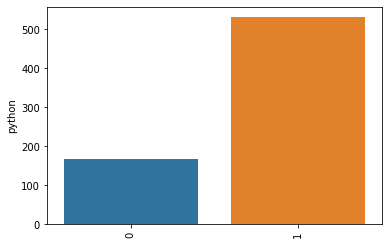

graph for R: total = 1


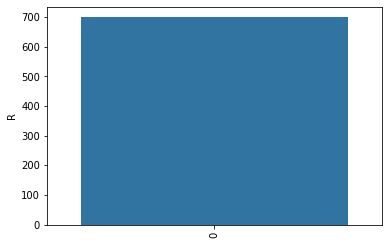

graph for spark: total = 2


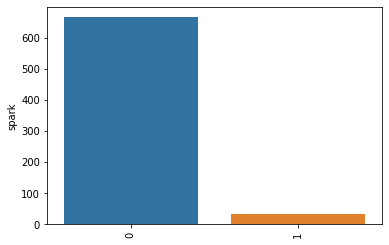

graph for aws: total = 2


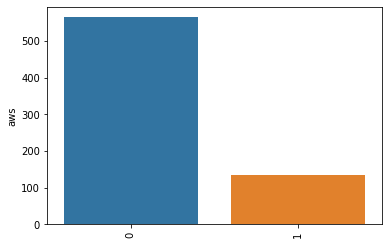

graph for sql: total = 2


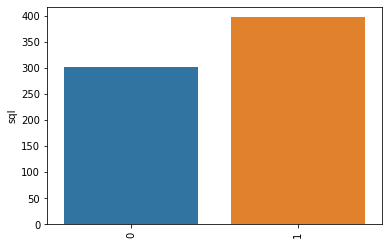

graph for microsoft_excel: total = 2


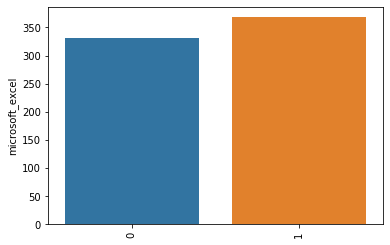

graph for job_simp: total = 5


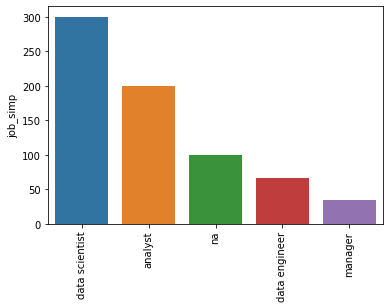

graph for seniority: total = 2


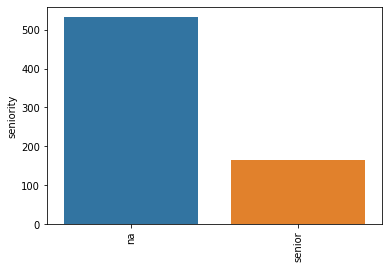

In [117]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


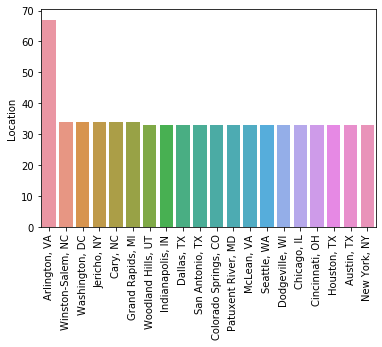

graph for Headquarters: total = 1


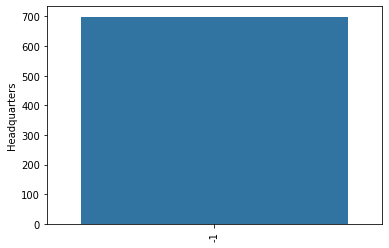

graph for company_text: total = 20


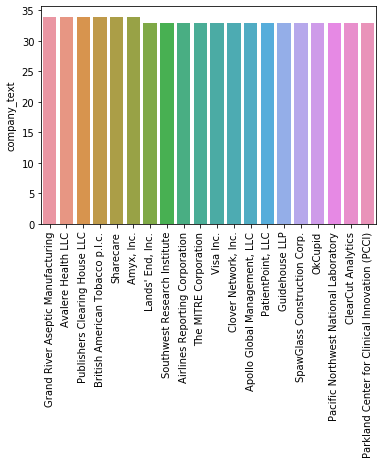

In [118]:
for i in df_cat[['Location', 'Headquarters', 'company_text']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [120]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,71.356784
data engineer,97.000000
data scientist,106.383333
manager,52.000000
na,74.190000


In [121]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        na          71.356784
data engineer  na          97.000000
data scientist na         103.670940
               senior     116.000000
manager        senior      52.000000
na             na          60.000000
               senior      81.500000

In [122]:
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
 WI       analyst                 33
 WA       data scientist          33
 VA       data scientist          33
          data engineer           33
          analyst                 34
 UT       analyst                 33
 TX       data engineer           33
          na                      66
          data scientist          33
 OH       data scientist          33
 NY       data scientist          34
          analyst                 33
 NC       manager                 34
          data scientist          34
 MI       na                      34
 MD       data scientist          33
 IN       analyst                 33
 IL       data scientist          33
 DC       data scientist          34
 CO       analyst                 33

In [123]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
TX,145.0
MD,124.5
VA,111.0
DC,107.5
NY,105.5
IL,100.0
WA,89.5
NC,88.0
OH,87.0


In [124]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'age', 'python', 'R', 'spark', 'aws',
       'sql', 'microsoft_excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [ ]:
#rating, industry, sector, revenue, number of comp, hourly, employer provided, python, 
#spark, aws, sql, microsoft excel, desc_len, Type of ownership

In [134]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'employer provided', 'python', 'R', 'spark', 'aws',
       'sql', 'microsoft_excel', 'Type of ownership', 'avg_salary']]

In [136]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
3.7     145.000000
3.4     105.500000
5.0     100.000000
3.2      95.950000
3.9      95.250000
4.0      88.313433
4.2      88.000000
3.3      78.666667
3.5      77.103960
4.4      76.250000
3.8      70.470149
Industry
                                     avg_salary
Industry                                       
Consulting                           115.873134
Federal Agencies                     111.000000
Research & Development               100.500000
Advertising & Marketing               96.388060
IT Services                           94.150000
Financial Transaction Processing      93.500000
Construction                          90.500000
Energy                                89.500000
Internet                              88.000000
Venture Capital & Private Equity      69.000000
Department, Clothing, & Shoe Stores   64.500000
Biotech & Pharmaceuticals             60.000000
Consumer Products Manufacturing       52.000000
Insurance Carrier

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [137]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python', values = 'avg_salary', aggfunc = 'count')

python,0,1
Revenue,,
$1 to $2 billion (USD),NaN,99.0
$10+ billion (USD),34.0,66.0
$100 to $500 million (USD),NaN,66.0
$50 to $100 million (USD),34.0,NaN
$500 million to $1 billion (USD),66.0,134.0
Less than $1 million (USD),34.0,34.0
Unknown / Non-Applicable,NaN,132.0


In [140]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

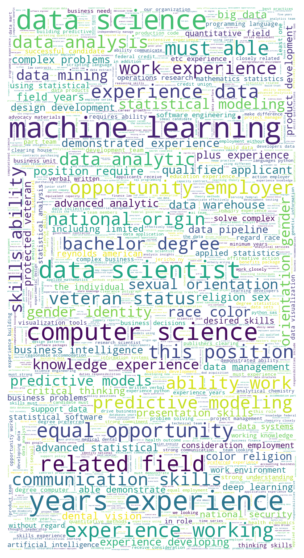

In [143]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state = 1, stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()